In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

#import psutil
from time import time
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier


digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,stratify = digits.target, random_state = 0)
dtree = DecisionTreeClassifier(random_state = 0)  
# what's this random state for?
dtree.fit(X_train, y_train)
print("Decision tree score - training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Decision tree score - test set: {:.3f}".format(dtree.score(X_test, y_test)))

dtree_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)  
dtree_entropy.fit(X_train, y_train)
print("Decision tree using entropy score - training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Decision tree using entropy score - test set: {:.3f}".format(dtree.score(X_test, y_test)))

#------------------------------------------------------------------------------------------
print("-------------------------------")

dtree_final = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf =3, random_state = 0)  
start = time() #before fitting
dtree_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("Decision tree score - training (entropy, maxdep7, minleaf3) : {:.3f}".format(dtree_final.score(X_train, y_train)))
print("Decision tree score - test (entropy, maxdep7, minleaf3) : {:.3f}".format(dtree_final.score(X_test, y_test)))


#------------------------------------------------------------------------------------------
print("-------------------------------")
dtree_final2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf =2, random_state = 0)  
start = time() #before fitting
dtree_final2.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("Decision tree score - training (gini, maxdep8, minleaf2) : {:.3f}".format(dtree_final2.score(X_train, y_train)))
print("Decision tree score - test (gini, maxdep8, minleaf2) : {:.3f}".format(dtree_final2.score(X_test, y_test)))


Decision tree score - training set: 1.000
Decision tree score - test set: 0.856
Decision tree using entropy score - training set: 1.000
Decision tree using entropy score - test set: 0.856
-------------------------------
time took: 0.019 seconds 
Decision tree score - training (entropy, maxdep7, minleaf3) : 0.947
Decision tree score - test (entropy, maxdep7, minleaf3) : 0.833
-------------------------------
time took: 0.015 seconds 
Decision tree score - training (gini, maxdep8, min leaf 2) : 0.921
Decision tree score - test (gini, maxdep8, min leaf 2) : 0.829


###Tree Visualization

In [ ]:
#maybe - if I have time

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

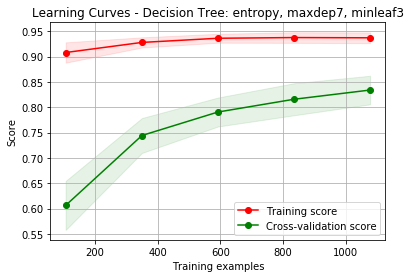

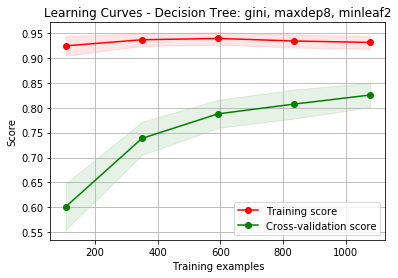

In [41]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train
#-----------
title = "Learning Curves - Decision Tree: entropy, maxdep7, minleaf3"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = dtree_final
plot_learning_curve(estimator, title, X, y, cv = cv, n_jobs = 4) #ylim = (0.8, 1.01), 
#-----------
title = "Learning Curves - Decision Tree: gini, maxdep8, minleaf2"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = dtree_final2
plot_learning_curve(estimator, title, X, y,  cv = cv, n_jobs = 4)
#-----------


### validation curve

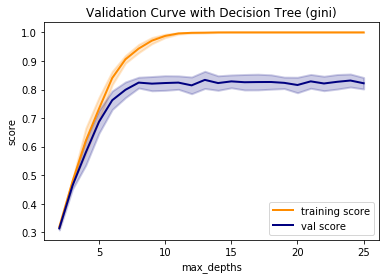

[0.3192259  0.47885258 0.62006594 0.7327912  0.84035559 0.90581887
 0.94343133 0.97115679 0.98762158 0.99628565 0.9985133  0.99900901
 0.99987578 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
[0.31399211 0.46394398 0.57950118 0.68712005 0.76261198 0.79913731
 0.82428428 0.82063248 0.82278719 0.82426462 0.81463526 0.83379502
 0.82266852 0.82856524 0.82561089 0.82621762 0.82641258 0.82340179
 0.81588538 0.82862246 0.82121075 0.82709564 0.83156491 0.82198581]


In [29]:
max_depths = range(2,26)
#criterion = 'entropy'
training_score, val_score = validation_curve(DecisionTreeClassifier(), 
                                             X_train, y_train,
                                             param_name = "max_depth", 
                                             param_range = max_depths, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (gini)") 
plt.xlabel("max_depths")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_depths, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_depths, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_depths, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_depths, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(train_score_mean)
print(val_score_mean)

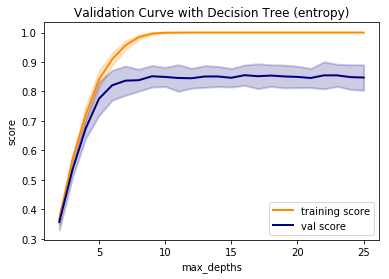

[0.36611257 0.57052105 0.72088911 0.841178   0.90946392 0.95646874
 0.98417187 0.99629359 0.99938221 0.99975284 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
[0.35723987 0.53469592 0.67492218 0.77558843 0.82102749 0.8366289
 0.83823453 0.85151614 0.84927178 0.8457371  0.84479067 0.85084067
 0.85081467 0.84636757 0.85526047 0.85173923 0.85391416 0.8509215
 0.84938713 0.84571597 0.85466506 0.854613   0.84871974 0.84721649]


In [30]:
training_score, val_score = validation_curve(DecisionTreeClassifier(criterion = 'entropy'), 
                                             X_train, y_train,
                                             param_name = "max_depth", 
                                             param_range = max_depths, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (entropy)") 
plt.xlabel("max_depths")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_depths, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_depths, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_depths, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_depths, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(train_score_mean)
print(val_score_mean)

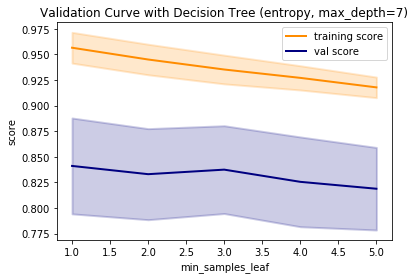

[0.84110953 0.83304951 0.83748418 0.82556433 0.81882097]


In [33]:
min_samples_leaf = range(1,6) 
training_score, val_score = validation_curve(DecisionTreeClassifier(criterion = 'entropy',  max_depth=7), 
                                             X_train, y_train,
                                             param_name = "min_samples_leaf", 
                                             param_range = min_samples_leaf, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (entropy, max_depth=7)") 
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(min_samples_leaf, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(min_samples_leaf, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(min_samples_leaf, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(min_samples_leaf, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(val_score_mean)

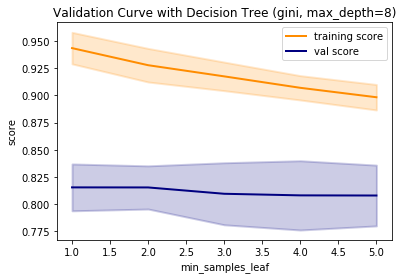

[0.81542238 0.81536894 0.80954525 0.80807877 0.80795279]


In [35]:
min_samples_leaf = range(1,6) 
training_score, val_score = validation_curve(DecisionTreeClassifier(criterion = 'gini',  max_depth=8), 
                                             X_train, y_train,
                                             param_name = "min_samples_leaf", 
                                             param_range = min_samples_leaf, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (gini, max_depth=8)") 
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(min_samples_leaf, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(min_samples_leaf, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(min_samples_leaf, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(min_samples_leaf, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(val_score_mean)

In [21]:
#grid search v. randomize search
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i)) 
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   

#---------------------------------------------------------------------------------------------
"""<bound method BaseEstimator.get_params of DecisionTreeClassifier(
            class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>"""

param_grid = {'criterion': ['entropy'],
              'max_depth': np.arange(2,100 ), #(2,10)
              'min_samples_leaf':np.arange(1,3)}
            
grid_search = GridSearchCV(dtree, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 19.98 seconds for 196 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.852 (std: 0.032)
Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.845 (std: 0.028)
Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2}

Model with rank: 2
Mean validation score: 0.845 (std: 0.025)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}

Model with rank: 4
Mean validation score: 0.844 (std: 0.024)
Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}

Model with rank: 4
Mean validation score: 0.844 (std: 0.027)
Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2}



c:\users\nfleming\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
param_grid = {'criterion': ['gini'],
              'max_depth': np.arange(2,100 ), #(2,10)
              'min_samples_leaf':np.arange(1,3)}
            
grid_search = GridSearchCV(dtree, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 15.20 seconds for 196 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.837 (std: 0.026)
Parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1}

Model with rank: 1
Mean validation score: 0.837 (std: 0.019)
Parameters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1}

Model with rank: 1
Mean validation score: 0.837 (std: 0.019)
Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1}

Model with rank: 4
Mean validation score: 0.837 (std: 0.020)
Parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1}

Model with rank: 5
Mean validation score: 0.835 (std: 0.022)
Parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1}



c:\users\nfleming\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
np.random.seed(0)
# X, y = prepareDataframeX.values, prepareDataframeY.values.ravel()

#X, y = digits.data, digits.target

#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

param_range = np.arange(1, 41, 2)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(class_weight='balanced'), X, y, param_name="max_depth", cv=10, 
    param_range=param_range,n_jobs=psutil.cpu_count(),
    scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
#plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, train_scores_mean, label="Training score",
             color="r")
#plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range)
#plt.savefig('DSSE.jpg')
plt.show()